# Python Example Portfolio Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv('all_data.csv')

# Inspect the dataset 
print(df.info())

# Describe the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.75000

### GDP in each country over time

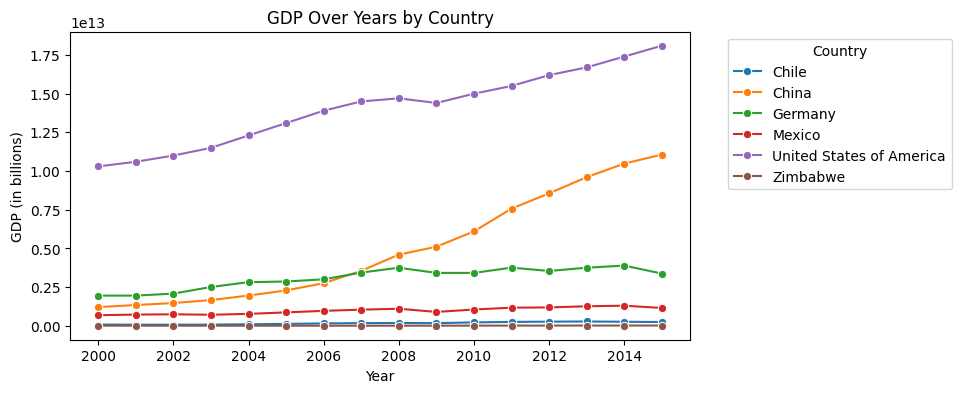

In [9]:
# Visualize the GDP in each country over the years
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Year', y='GDP', hue='Country', marker='o')
plt.title('GDP Over Years by Country')
plt.xlabel('Year')
plt.ylabel('GDP (in billions)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Life expectency per country over the years

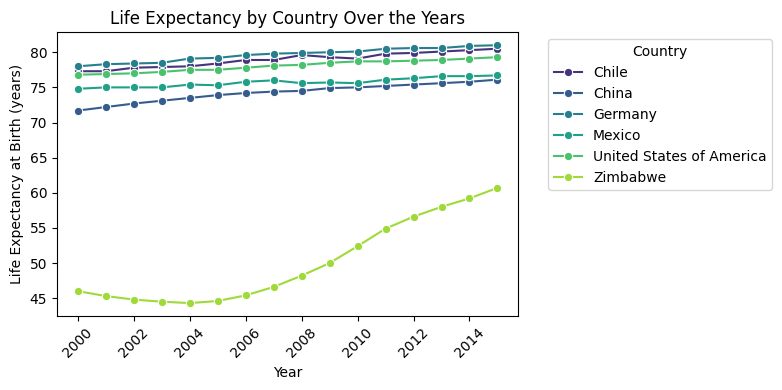

In [12]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country', marker='o', palette='viridis')
plt.title('Life Expectancy by Country Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Looking at average life expectency per country (averaged across years)

C:\Users\kolby\AppData\Local\Temp\ipykernel_92112\344773745.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_life_expectancy, x='Country', y='Life expectancy at birth (years)', palette='viridis')


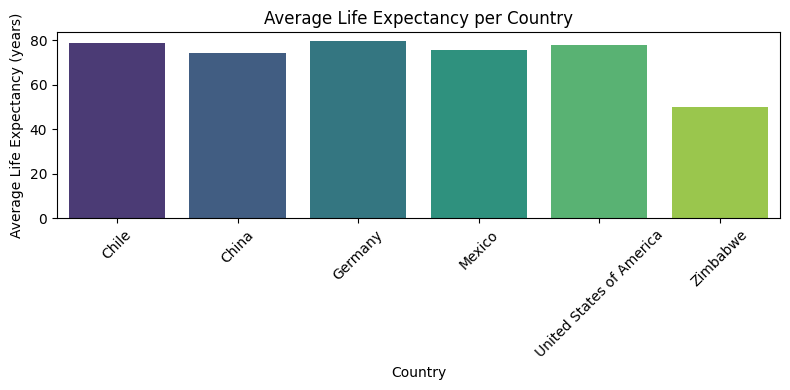

In [13]:
# Calculate average life expectancy per country
avg_life_expectancy = df.groupby('Country')['Life expectancy at birth (years)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(data=avg_life_expectancy, x='Country', y='Life expectancy at birth (years)', palette='viridis')
plt.title('Average Life Expectancy per Country')
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy (years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The relationship between country GDP and Life Expectency Averaging Across Years

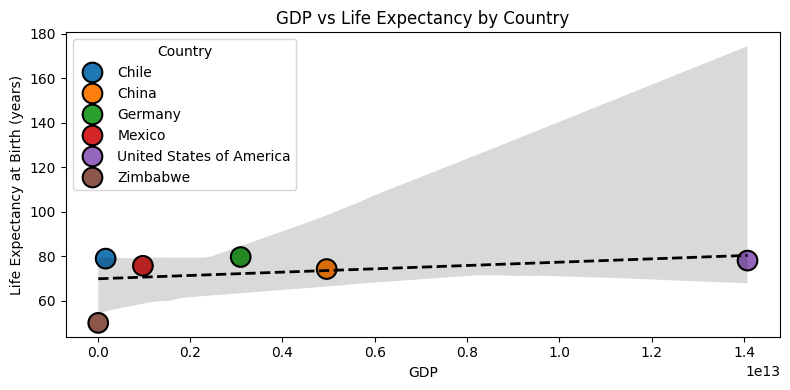

In [26]:
avg_life_expectancy = df.groupby('Country')['Life expectancy at birth (years)'].mean().reset_index()
avg_gdp_per_country = df.groupby('Country')['GDP'].mean().reset_index()
# Merge the two dataframes
df_merged = pd.merge(avg_life_expectancy, avg_gdp_per_country, on='Country')

plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df_merged,
    x='GDP',
    y='Life expectancy at birth (years)',
    hue='Country',
    palette='tab10',
    s=200,
    edgecolor='black',
    linewidth=1.5
)
plt.title('GDP vs Life Expectancy by Country')
plt.xlabel('GDP (in billions)')
# Add regression line
sns.regplot(
    data=df_merged,
    x='GDP',
    y='Life expectancy at birth (years)',
    scatter=False,
    color='black',
    line_kws={'linewidth': 2, 'linestyle': '--'}
)
plt.ylabel('Life Expectancy at Birth (years)')
plt.legend(title='Country', loc='best')
plt.tight_layout()
plt.show()

In [28]:
from scipy.stats import linregress

# Calculate regression coefficient (slope) between GDP and Life Expectancy
slope, intercept, r_value, p_value, std_err = linregress(
    df_merged['GDP'], df_merged['Life expectancy at birth (years)']
)

print(f"Regression coefficient (slope) of GDP vs Life Expectancy: {slope}")
print(f"R-squared value: {r_value**2}")
print(f"P-value: {p_value}")

Regression coefficient (slope) of GDP vs Life Expectancy: 7.450865848199246e-13
R-squared value: 0.12420782720594568
P-value: 0.4932404007944224
